In [ ]:
from google.colab import drive
drive.mount('/content/mydive')

Mounted at /content/mydive


# ƒê·ªí √ÅN PH√ÇN T√çCH D·ªÆ LI·ªÜU



In [ ]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import warnings
warnings.filterwarnings("ignore")

## Chu·∫©n b·ªã d·ªØ li·ªáu

In [ ]:
# Importing dataset
df=pd.read_csv('/content/mydive/MyDrive/PhanTichDuLieu/Tweets.csv')
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [ ]:
df = df[['airline','text']]
df.head()

airline                                               text
0  Virgin America                @VirginAmerica What @dhepburn said.
1  Virgin America  @VirginAmerica plus you've added commercials t...
2  Virgin America  @VirginAmerica I didn't today... Must mean I n...
3  Virgin America  @VirginAmerica it's really aggressive to blast...
4  Virgin America  @VirginAmerica and it's a really big bad thing...

In [ ]:
df

airline                                               text
0      Virgin America                @VirginAmerica What @dhepburn said.
1      Virgin America  @VirginAmerica plus you've added commercials t...
2      Virgin America  @VirginAmerica I didn't today... Must mean I n...
3      Virgin America  @VirginAmerica it's really aggressive to blast...
4      Virgin America  @VirginAmerica and it's a really big bad thing...
...               ...                                                ...
14635        American  @AmericanAir thank you we got on a different f...
14636        American  @AmericanAir leaving over 20 minutes Late Flig...
14637        American  @AmericanAir Please bring American Airlines to...
14638        American  @AmericanAir you have my money, you change my ...
14639        American  @AmericanAir we have 8 ppl so we need 2 know h...

[14640 rows x 2 columns]

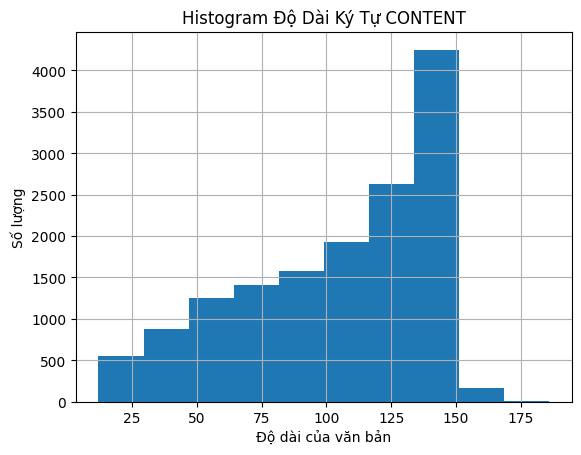

In [ ]:
import matplotlib.pyplot as plt
# Theo ƒë·ªô d√†i k√Ω t·ª±
df['text'].str.len().hist()
plt.xlabel('ƒê·ªô d√†i c·ªßa vƒÉn b·∫£n')
plt.ylabel('S·ªë l∆∞·ª£ng')
plt.title('Histogram ƒê·ªô D√†i K√Ω T·ª± CONTENT')
plt.show()

<Axes: >

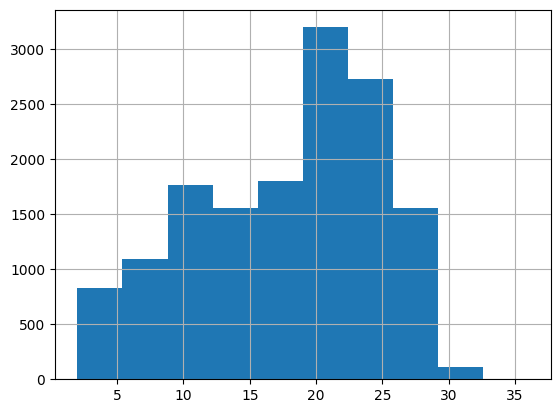

In [ ]:
# Theo s·ªë l∆∞·ª£ng T·ª´
df['text'].str.split().map(lambda x : len(x)).hist()

## X·ª≠ l√Ω d·ªØ li·ªáu

In [ ]:
df.isnull().sum()

airline    0
text       0
dtype: int64

In [ ]:
df.columns

Index(['airline', 'text'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   airline  14640 non-null  object
 1   text     14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


## L√†m s·∫°ch d·ªØ li·ªáu

X·ª≠ l√Ω chu·ªói (symbol,punctuations)

In [ ]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
df['airline']=df['airline'].apply(lambda x: x.split(',,,')[0])

In [ ]:
# Lo·∫°i b·ªè t√™n c√°c h√£ng bay kh·ªèi c√°c b√¨nh lu·∫≠n trong c·ªôt 'text'
def remove_airline_names_from_text(row):
    airline_name = row['airline'].lower().replace(" ", "")
    text = row['text'].lower()
    text = text.replace("@" + airline_name, "")  # Lo·∫°i b·ªè t√™n h√£ng bay
    return text

# √Åp d·ª•ng h√†m lo·∫°i b·ªè t√™n h√£ng bay cho c·ªôt 'text' trong DataFrame
df['text'] = df.apply(remove_airline_names_from_text, axis=1)

In [ ]:
for index,text in enumerate(df['text'][35:40]):
  print('Comment %d:\n'%(index+1),text)

Comment 1:
 nice rt : vibe with the moodlight from takeoff to touchdown. #moodlitmonday #sciencebehindtheexperience http://t.co/y7o0unxtqp
Comment 2:
  moodlighting is the only way to fly! best experience ever! cool and calming. üíú‚úà #moodlitmonday
Comment 3:
  @freddieawards done and done! best airline around, hands down!
Comment 4:
  when can i book my flight to hawaii??
Comment 5:
  your chat support is not working on your site: http://t.co/vhp2gtdwpk


X·ª≠ l√Ω c√°c d·∫°ng t·ª´

Expand Contractions

In [ ]:
import re

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['text'] = df['text'].apply(lambda x: expand_contractions(x))

Lowercase the reviews

In [ ]:
df['clean_text']=df['text'].apply(lambda x: x.lower())

Remove digits and words containing digits

In [ ]:
df['clean_text']=df['clean_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

Remove Punctuations

In [ ]:
df['clean_text']=df['clean_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
# Removing extra spaces
df['clean_text']=df['clean_text'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
import re

# T·∫°o bi·ªÉu th·ª©c ch√≠nh quy ƒë·ªÉ t√¨m icon Unicode
icon_regex = r'[\U00010000-\U0010FFFF]'

# H√†m ƒë·ªÉ l·ªçc ra t·∫•t c·∫£ c√°c icon Unicode t·ª´ m·ªôt chu·ªói
def find_icons(text):
    return re.findall(icon_regex, text)

# √Åp d·ª•ng h√†m cho c·ªôt 'cleaned' trong DataFrame
df['icons'] = df['clean_text'].apply(find_icons)

In [ ]:
df.head()

airline                                               text  \
0  Virgin America                               what @dhepburn said.   
1  Virgin America   plus you have added commercials to the experi...   
2  Virgin America   i did not today... must mean i need to take a...   
3  Virgin America   it is really aggressive to blast obnoxious "e...   
4  Virgin America          and it is a really big bad thing about it   

                                          clean_text icons  
0                                 what dhepburn said    []  
1   plus you have added commercials to the experi...    []  
2   i did not today must mean i need to take anot...    []  
3   it is really aggressive to blast obnoxious en...    []  
4          and it is a really big bad thing about it    []

In [ ]:
# H√†m ƒë·ªÉ lo·∫°i b·ªè c√°c icon Unicode t·ª´ m·ªôt chu·ªói
def remove_icons(text):
    return re.sub(icon_regex, '', text)

# √Åp d·ª•ng h√†m lo·∫°i b·ªè icon cho c·ªôt 'cleaned' trong DataFrame
df['clean_text'] = df['clean_text'].apply(remove_icons)

In [ ]:
for index,text in enumerate(df['clean_text'][45:60]):
  print('Comment %d:\n'%(index+1),text)

Comment 1:
  im elevategold for a good reason you rock
Comment 2:
  dream httptco httptco
Comment 3:
  wow this just blew my mind
Comment 4:
  ladygaga carrieunderwood after last night tribute soundofmusic ladygaga i think carrieunderwood agree
Comment 5:
  ladygaga carrieunderwood all were entertaining
Comment 6:
  is flight on it is way was supposed to take off minutes ago website still shows on time not in flight thanks
Comment 7:
  ladygaga carrieunderwood julie andrews all the way though ladygaga was very impressive no to carrieunderwood
Comment 8:
  wish you flew out of atlanta soon
Comment 9:
  ladygaga carrieunderwood julie andrews hands down
Comment 10:
  will flights be leaving dallas for la on february 
Comment 11:
  hi im so excited about your lgagtdal deal but ive been trying book since last week amp the page never loads thx
Comment 12:
  you know it need it on my spotify stat guiltypleasures
Comment 13:
  ladygaga carrieunderwood im lady gaga she is amazing 
Comment 14:
 

In [ ]:
df.head()

airline                                               text  \
0  Virgin America                               what @dhepburn said.   
1  Virgin America   plus you have added commercials to the experi...   
2  Virgin America   i did not today... must mean i need to take a...   
3  Virgin America   it is really aggressive to blast obnoxious "e...   
4  Virgin America          and it is a really big bad thing about it   

                                          clean_text icons  
0                                 what dhepburn said    []  
1   plus you have added commercials to the experi...    []  
2   i did not today must mean i need to take anot...    []  
3   it is really aggressive to blast obnoxious en...    []  
4          and it is a really big bad thing about it    []

X·ª≠ l√Ω stopword v√† lemmatization (Document Term Matrix)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Download stopwords v√† wordnet t·ª´ nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Kh·ªüi t·∫°o WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Kh·ªüi t·∫°o CountVectorizer ƒë·ªÉ t·∫°o Document Term Matrix
vectorizer = CountVectorizer()

In [ ]:
# X√¢y d·ª±ng stopword list
stop_words = set(stopwords.words('english'))

In [ ]:
# H√†m x·ª≠ l√Ω vƒÉn b·∫£n: lo·∫°i b·ªè stopword v√† lemmatization
def process_text(text):
    # T√°ch t·ª´
    tokens = word_tokenize(text)
    # Lo·∫°i b·ªè stopword v√† lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

In [ ]:
# √Åp d·ª•ng h√†m x·ª≠ l√Ω vƒÉn b·∫£n cho tr∆∞·ªùng cleaned
df['cleaned'] = df['clean_text'].apply(process_text)

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['clean_text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
df_grouped=df[['airline','lemmatized']].groupby(by='airline').agg(lambda x:' '.join(x))
df_grouped.head()

lemmatized
airline                                                      
American    air consider continue point program receive pe...
Delta       jetblue yesterday way ewr fll takeoff \n wheel...
Southwest   air wait hit hour air m happy cancel flight fl...
US Airways    well time flight friday need change worried ...
United        thank   thank take care mr happy customer   ...

In [ ]:
df_cleaned = df.copy()

In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index
df_dtm.head(3)

aa  aaaand  aaadvantage  aaalwayslate  aaba  aacom  \
airline                                                          
American   167       0            1             1     0      1   
Delta        3       0            0             0     0      0   
Southwest    1       0            0             0     0      0   

           aacustomerservice  aadavantage  aadelay  aadfw  ...  zipper  \
airline                                                    ...           
American                   1            1        1      2  ...       0   
Delta                      0            0        0      0  ...       0   
Southwest                  0            0        0      0  ...       1   

           zkatcher  zombie  zone  zoom  zrh  zrhairport  zuke  zurich  \
airline                                                                  
American          0       0     2     1    0           0     0       1   
Delta             3       1     0     0    0           0     0       0   
Southwest         0       0     0     1    0           0     0       0   

           zurichnew  
airline               
American           1  
Delta              0  
Southwest          0  

[3 rows x 11049 columns]

Kh√°m ph√° d·ªØ li·ªáu

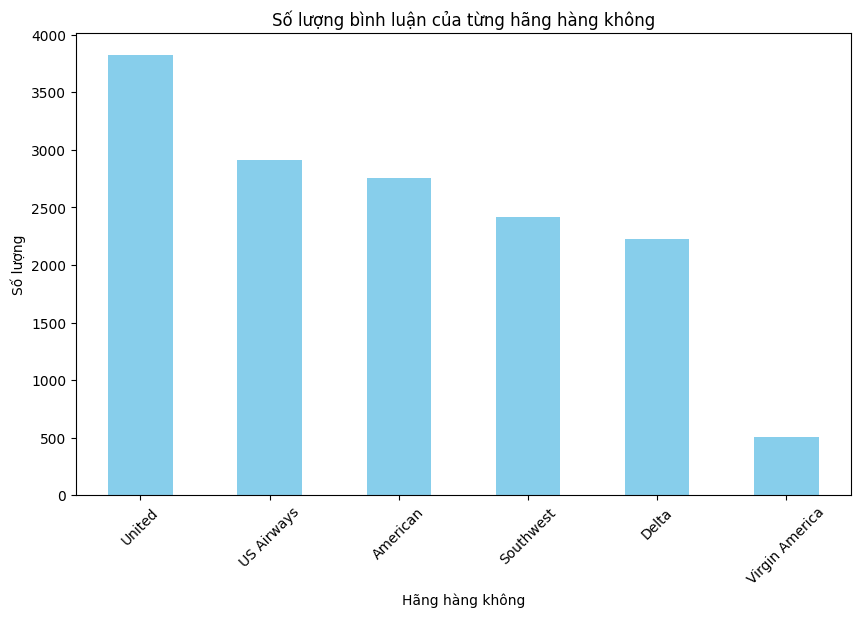

In [ ]:
# T√≠nh t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa t·ª´ng h√£ng h√†ng kh√¥ng trong c√°c b√¨nh lu·∫≠n
airline_frequency = df['airline'].value_counts()

# Tr·ª±c quan h√≥a k·∫øt qu·∫£
plt.figure(figsize=(10, 6))
airline_frequency.plot(kind='bar', color='skyblue')
plt.title('S·ªë l∆∞·ª£ng b√¨nh lu·∫≠n c·ªßa t·ª´ng h√£ng h√†ng kh√¥ng')
plt.xlabel('H√£ng h√†ng kh√¥ng')
plt.ylabel('S·ªë l∆∞·ª£ng')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_cleaned.head()

airline                                               text  \
0  Virgin America                               what @dhepburn said.   
1  Virgin America   plus you have added commercials to the experi...   
2  Virgin America   i did not today... must mean i need to take a...   
3  Virgin America   it is really aggressive to blast obnoxious "e...   
4  Virgin America          and it is a really big bad thing about it   

                                          clean_text icons  \
0                                 what dhepburn said    []   
1   plus you have added commercials to the experi...    []   
2   i did not today must mean i need to take anot...    []   
3   it is really aggressive to blast obnoxious en...    []   
4          and it is a really big bad thing about it    []   

                                             cleaned  \
0                                      dhepburn said   
1             plus added commercial experience tacky   
2             today must mean need take another trip   
3  really aggressive blast obnoxious entertainmen...   
4                               really big bad thing   

                                          lemmatized  
0                                       dhepburn say  
1               plus add commercial experience tacky  
2                               today mean need trip  
3    aggressive blast obnoxious entertainment gue...  
4                                      big bad thing

In [ ]:
import nltk
# paste this at the start of code
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from collections import Counter

stop=set(stopwords.words('english'))

def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = word_tokenize(column)
    return [w for w in tokens if w.isalpha()]


# df_cleaned['cleaned_token'] = df_cleaned['cl'].apply(word_tokenize)
df_cleaned['cleaned_token'] = df_cleaned.apply(lambda x: tokenize(x['cleaned']), axis=1)
df_cleaned.head()

airline                                               text  \
0  Virgin America                               what @dhepburn said.   
1  Virgin America   plus you have added commercials to the experi...   
2  Virgin America   i did not today... must mean i need to take a...   
3  Virgin America   it is really aggressive to blast obnoxious "e...   
4  Virgin America          and it is a really big bad thing about it   

                                          clean_text icons  \
0                                 what dhepburn said    []   
1   plus you have added commercials to the experi...    []   
2   i did not today must mean i need to take anot...    []   
3   it is really aggressive to blast obnoxious en...    []   
4          and it is a really big bad thing about it    []   

                                             cleaned  \
0                                      dhepburn said   
1             plus added commercial experience tacky   
2             today must mean need take another trip   
3  really aggressive blast obnoxious entertainmen...   
4                               really big bad thing   

                                          lemmatized  \
0                                       dhepburn say   
1               plus add commercial experience tacky   
2                               today mean need trip   
3    aggressive blast obnoxious entertainment gue...   
4                                      big bad thing   

                                       cleaned_token  
0                                   [dhepburn, said]  
1       [plus, added, commercial, experience, tacky]  
2     [today, must, mean, need, take, another, trip]  
3  [really, aggressive, blast, obnoxious, enterta...  
4                          [really, big, bad, thing]

In [ ]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

df_cleaned['cleaned_token'] = df_cleaned['cleaned_token'].apply(lambda x: extract_ngrams(x, 2))
df_cleaned.head()

airline                                               text  \
0  Virgin America                               what @dhepburn said.   
1  Virgin America   plus you have added commercials to the experi...   
2  Virgin America   i did not today... must mean i need to take a...   
3  Virgin America   it is really aggressive to blast obnoxious "e...   
4  Virgin America          and it is a really big bad thing about it   

                                          clean_text icons  \
0                                 what dhepburn said    []   
1   plus you have added commercials to the experi...    []   
2   i did not today must mean i need to take anot...    []   
3   it is really aggressive to blast obnoxious en...    []   
4          and it is a really big bad thing about it    []   

                                             cleaned  \
0                                      dhepburn said   
1             plus added commercial experience tacky   
2             today must mean need take another trip   
3  really aggressive blast obnoxious entertainmen...   
4                               really big bad thing   

                                          lemmatized  \
0                                       dhepburn say   
1               plus add commercial experience tacky   
2                               today mean need trip   
3    aggressive blast obnoxious entertainment gue...   
4                                      big bad thing   

                                       cleaned_token  
0                                    [dhepburn said]  
1  [plus added, added commercial, commercial expe...  
2  [today must, must mean, mean need, need take, ...  
3  [really aggressive, aggressive blast, blast ob...  
4                   [really big, big bad, bad thing]

In [ ]:
def combine_words(word_list):
    all_words = []
    for word in word_list: all_words += word
    return all_words

def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending =False)
    word_count_sorted
    return word_count_sorted[:10]

reviews = df_cleaned['cleaned_token']
reviews_words = combine_words(reviews)
reviews_words[:10]

['dhepburn said',
 'plus added',
 'added commercial',
 'commercial experience',
 'experience tacky',
 'today must',
 'must mean',
 'mean need',
 'need take',
 'take another']

In [ ]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head(10)

words  word_count
470       customer service         564
611    cancelled flightled         498
549            late flight         245
884       flight cancelled         239
21852           air flight         219
1108    cancelled flighted         219
27746           air thanks         190
552       cancelled flight         159
3441          late flightr         154
214        booking problem         149

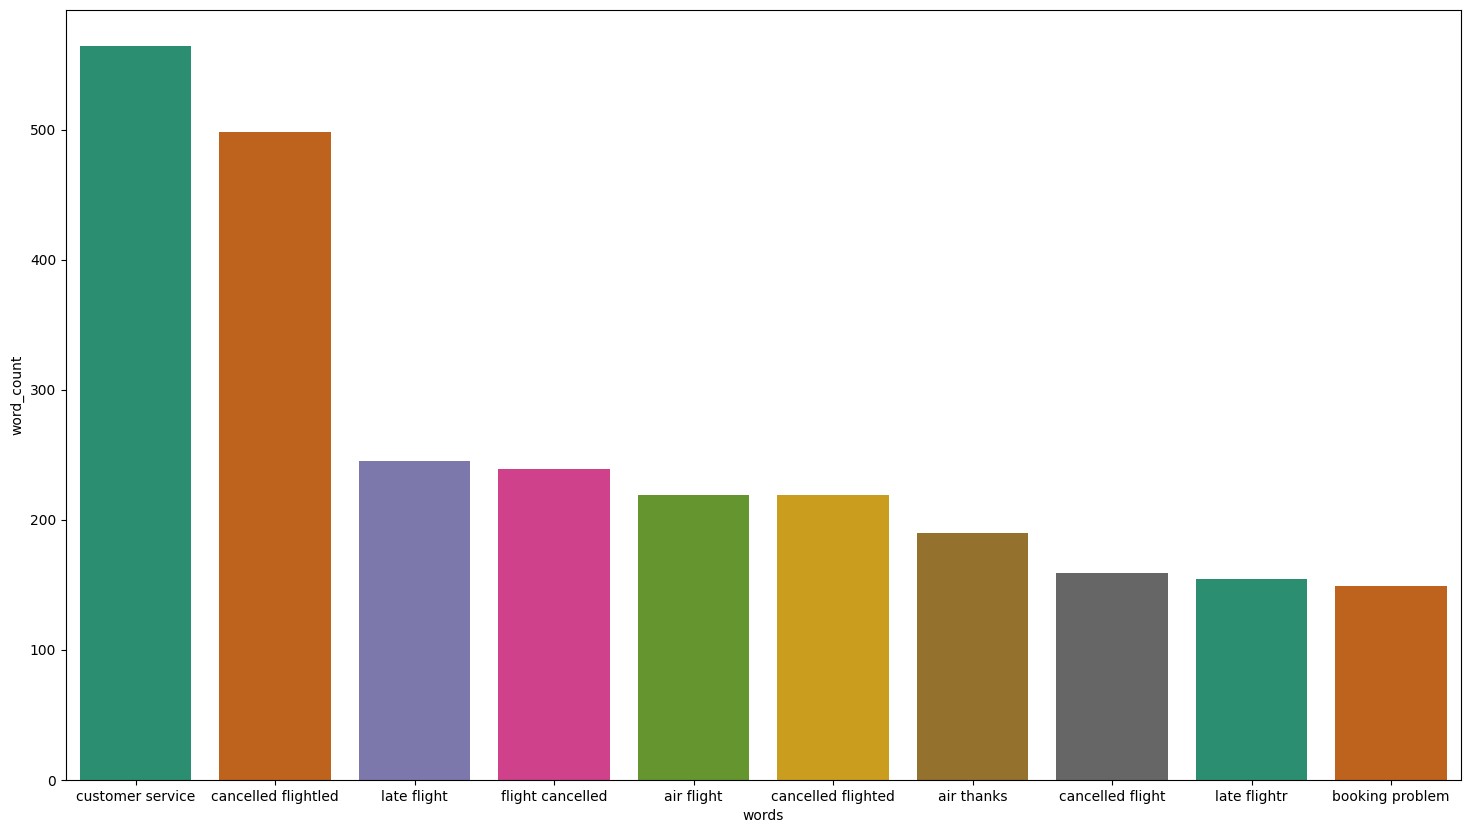

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.barplot(data=reviews_topword_count, x=reviews_topword_count['words'], y=reviews_topword_count['word_count'], palette='Dark2')
plt.show()

In [ ]:
# Ch·ªçn m·ªôt s·ªë t·ª´/c·ª•m t·ª´ quan tr·ªçng
important_words = ['customer service', 'cancelled flightled', 'late flight', 'flight cancelled']

# Tr√≠ch xu·∫•t m·∫´u vƒÉn b·∫£n ch·ª©a c√°c t·ª´/c·ª•m t·ª´ ƒë√£ ch·ªçn
sample_texts = []
for word in important_words:
    sample_text = df_cleaned[df_cleaned['cleaned'].str.contains(word)]['cleaned'].sample(5, random_state=42).values
    sample_texts.extend(sample_text)

# Hi·ªÉn th·ªã c√°c m·∫´u vƒÉn b·∫£n
for i, text in enumerate(sample_texts, start=1):
    print(f"Sample {i}: {text}\n")

Sample 1: air followed dmd please respond concern really disappointed customer service

Sample 2: air trying reach american airline since last evening cancelled flight flight worst customer service ever

Sample 3: air poor customer service problem

Sample 4: air customer service inferior nationalized third world nation airline get together

Sample 5: air group minor child broken group still miami delta much better customer service

Sample 6: air offered cot sleep onafter cancelled flightled flight fucking cot hotel like supposed provide

Sample 7: last minute flight deal cute little frequentflyer friday flight cancelled flightled

Sample 8: air two cancelled flightled lga flight delta took look like new carrier delta

Sample 9: air hold min trying rebook flight cancelled flightled help

Sample 10: air tell cancelled flightled flight v delay

Sample 11: worst flying experience life flight scheduled departure phl hr late flightr guess

Sample 12: flight aircraft gate crew hour late fligh

In [ ]:
# Ph√¢n t√≠ch ng·ªØ c·∫£nh s·ª≠ d·ª•ng c·ªßa c√°c t·ª´/c·ª•m t·ª´ quan tr·ªçng
for i, text in enumerate(sample_texts, start=1):
    print(f"Sample {i}: {text}\n")
    for word in important_words:
        if word in text:
            print(f"Word/Phrase: {word}")
            print("Context:")
            context = text.replace(word, f"\033[1m{word}\033[0m")
            print(context)
            print("\n")

Sample 1: air followed dmd please respond concern really disappointed customer service

Word/Phrase: customer service
Context:
air followed dmd please respond concern really disappointed customer service


Sample 2: air trying reach american airline since last evening cancelled flight flight worst customer service ever

Word/Phrase: customer service
Context:
air trying reach american airline since last evening cancelled flight flight worst customer service ever


Sample 3: air poor customer service problem

Word/Phrase: customer service
Context:
air poor customer service problem


Sample 4: air customer service inferior nationalized third world nation airline get together

Word/Phrase: customer service
Context:
air customer service inferior nationalized third world nation airline get together


Sample 5: air group minor child broken group still miami delta much better customer service

Word/Phrase: customer service
Context:
air group minor child broken group still miami delta much bett

D·ª±a v√†o c√°c ng·ªØ c·∫£nh n√†y, ch√∫ng ta c√≥ th·ªÉ r√∫t ra m·ªôt s·ªë nh·∫≠n x√©t v√† suy lu·∫≠n v·ªÅ √Ω nghƒ©a c·ªßa t·ª´ng t·ª´/c·ª•m t·ª´ trong ng·ªØ c·∫£nh c·ªßa d·ªØ li·ªáu:

* Customer Service (D·ªãch v·ª• kh√°ch h√†ng):C·ª•m t·ª´ "customer service" th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ph√™ ph√°n ho·∫∑c di·ªÖn ƒë·∫°t s·ª± th·∫•t v·ªçng ƒë·ªëi v·ªõi ch·∫•t l∆∞·ª£ng d·ªãch v·ª• kh√°ch h√†ng c·ªßa c√°c h√£ng h√†ng kh√¥ng.C√°c m·∫´u vƒÉn b·∫£n cho th·∫•y r·∫±ng nhi·ªÅu kh√°ch h√†ng ƒë√£ g·∫∑p ph·∫£i v·∫•n ƒë·ªÅ v·ªõi d·ªãch v·ª• kh√°ch h√†ng v√† th·ªÉ hi·ªán s·ª± th·∫•t v·ªçng v·ªÅ ƒëi·ªÅu n√†y.

* Cancelled Flight (Chuy·∫øn bay b·ªã h·ªßy):
C·ª•m t·ª´ "cancelled flight" th∆∞·ªùng xu·∫•t hi·ªán k√®m theo c·∫£m x√∫c kh√¥ng h√†i l√≤ng ho·∫∑c t·ª©c gi·∫≠n, ƒë·∫∑c bi·ªát khi g·∫∑p ph·∫£i s·ª± c·ªë v·ªÅ chuy·∫øn bay b·ªã h·ªßy.
C√°c m·∫´u vƒÉn b·∫£n c≈©ng cho th·∫•y s·ª± lo ng·∫°i v√† b·∫•t m√£n ƒë·ªëi v·ªõi vi·ªác qu·∫£n l√Ω c√°c t√¨nh hu·ªëng n√†y t·ª´ ph√≠a h√£ng h√†ng kh√¥ng.

* Late Flight (Chuy·∫øn bay tr·ªÖ):
C·ª•m t·ª´ "late flight" th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ch·ªâ s·ª± kh√¥ng h√†i l√≤ng khi g·∫∑p ph·∫£i t√¨nh tr·∫°ng chuy·∫øn bay tr·ªÖ.
C√≥ th·ªÉ th·∫•y r·∫±ng c√°c kh√°ch h√†ng ph·∫£n √°nh s·ª± b·∫•t m√£n khi ph·∫£i ch·ªù ƒë·ª£i ho·∫∑c g·∫∑p ph·∫£i s·ª± ch·∫≠m tr·ªÖ t·ª´ ph√≠a h√£ng h√†ng kh√¥ng.

In [ ]:
# Ph√¢n t√°ch d·ªØ li·ªáu theo t·ª´ng h√£ng h√†ng kh√¥ng
df_airline_groups = df_cleaned.groupby('airline')

# Ph√¢n t√≠ch √Ω nghƒ©a c·ªßa c√°c t·ª´/c·ª•m t·ª´ quan tr·ªçng trong t·ª´ng nh√≥m h√£ng h√†ng kh√¥ng
for airline, group_data in df_airline_groups:
    print(f"Airline: {airline}")
    reviews = group_data['cleaned_token']
    reviews_words = combine_words(reviews)
    reviews_topword_count = count_topwords(reviews_words)
    print(reviews_topword_count.head(10))
    print("\n")

Airline: American
                    words  word_count
114   cancelled flightled         162
161            air flight         127
11       customer service         111
16             air thanks         102
66       flight cancelled          76
67     cancelled flighted          68
140             air thank          56
3133            call back          53
306      cancelled flight          51
56            late flight          42


Airline: Delta
                words  word_count
398       fleet fleek         146
397     jetblue fleet         145
399     fleek httptco         121
200    jetblue thanks          97
15     jetblue flight          84
111     jetblue thank          58
876        rt jetblue          57
414  customer service          46
339     jetblue would          31
232        jetblue im          30


Airline: Southwest
                    words  word_count
752   cancelled flightled         111
88             air flight          90
579      customer service          90
